In [1]:
%matplotlib inline
%matplotlib notebook

import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import math
import matplotlib as mp
plt.switch_backend('agg')

if "./lib" not in sys.path:
  sys.path.append("./lib")

import plotting
from collections import deque, namedtuple
from readingFileEfficiently import *
import VOC2012_npz_files_writter
from DNN import *
from Agent import ObjLocaliser

/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


Instructions for updating:
Please switch to tf.train.get_global_step


/home/mohammad/Tensorflow/local/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Loading model checkpoint /home/mohammad/active localization/trained_on_cluster_final/increamental_learning/cats/checkpoints/model...

INFO:tensorflow:Restoring parameters from /home/mohammad/active localization/trained_on_cluster_final/increamental_learning/cats/checkpoints/model


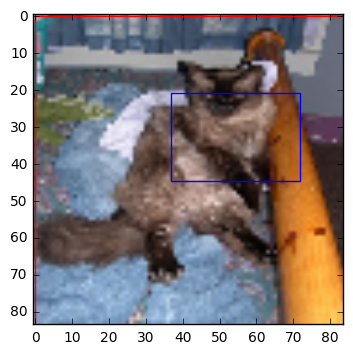

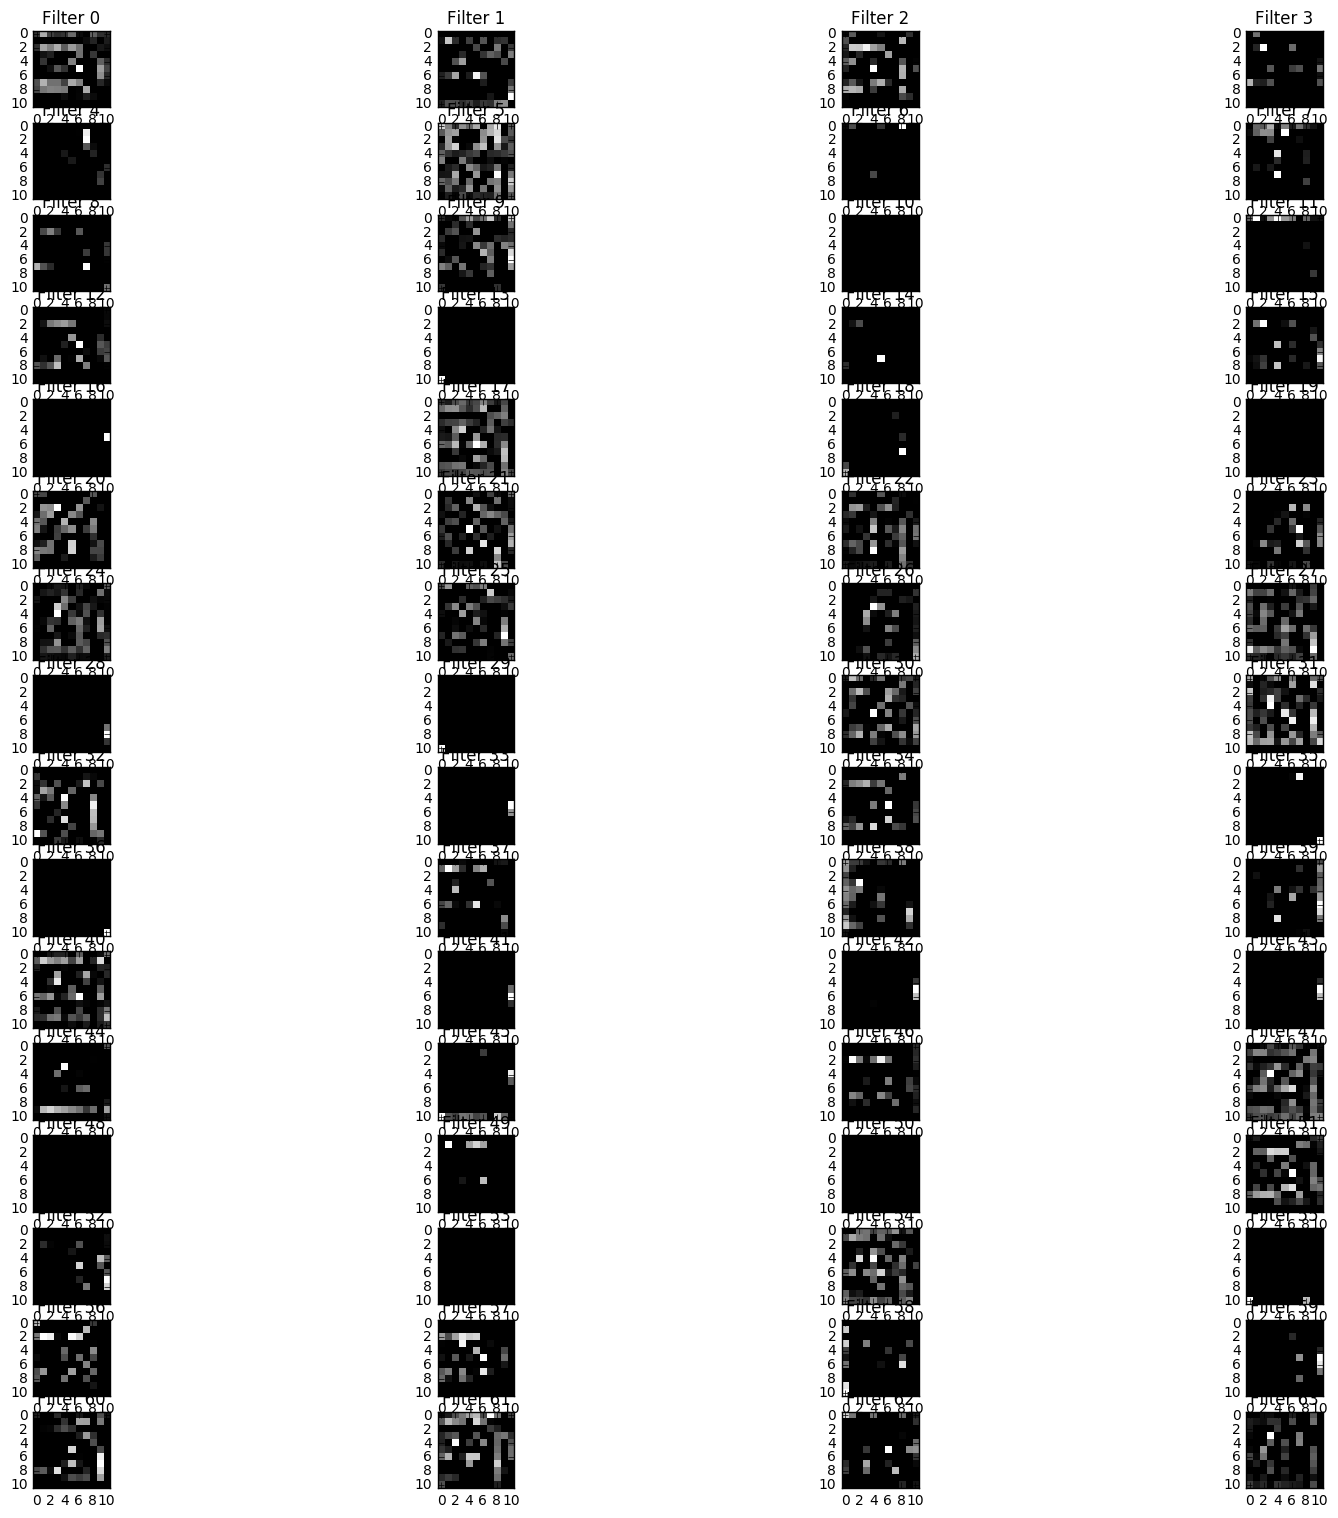

In [2]:
model_name = "cats"


tf.reset_default_graph()

# Where we save our checkpoints and graphs
experiment_dir = os.path.abspath("/home/mohammad/active localization/trained_on_cluster_final/increamental_learning/{}".format(model_name))

q_estimator = Estimator(scope="q_estimator", summaries_dir=experiment_dir)

# State processor
state_processor = StateProcessor()

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer()) # Old API: tf.initialize_all_variables()

    # Create directories for checkpoints and summaries
    checkpoint_dir = os.path.join(experiment_dir, "checkpoints")
    checkpoint_path = os.path.join(checkpoint_dir, "model")
    #report_path = os.path.join(experiment_dir, "report")

    saver = tf.train.Saver()
    # Load a previous checkpoint if we find one
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    if latest_checkpoint:
        print("Loading model checkpoint {}...\n".format(latest_checkpoint))
        saver.restore(sess, latest_checkpoint)
        
    im2 = np.array(Image.open('./input/2008_001210.jpg'))#train
    env = ObjLocaliser(np.array(im2),{'xmin':[164], 'xmax':[320], 'ymin':[123], 'ymax':[266]})
        
    env.drawActions()
    state = env.wrapping()
    state = state_processor.process(sess, state)
    state = np.stack([state] * 4, axis=2)
    q_estimator.visulize_layers(sess, state.reshape((-1, 84, 84, 4)), "1")

    

link to code: https://github.com/dennybritz/reinforcement-learning/blob/master/DQN/Deep%20Q%20Learning%20Solution.ipynb

https://www.oreilly.com/ideas/reinforcement-learning-with-tensorflow